# Train ML_2

In [ ]:
#| hide
import sys
sys.path.append("/notebooks/katlas")
from nbdev.showdoc import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [ ]:
from katlas.core import *
from katlas.train import *
from katlas.plot import *
from fastbook import *
from sklearn.neighbors import *
from sklearn.linear_model import *
from sklearn.tree import *
from sklearn.svm import *
from sklearn.ensemble import *
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor

/usr/local/lib/python3.9/dist-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/lib/python3.9/dist-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/lib/python3.9/dist-packages/umap/distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword argument 

In [ ]:
df = pd.read_parquet('train/scaled_t5.parquet')

In [ ]:
df.head()

,kinase,-1A,-1C,-1D,-1E,-1F,-1G,-1H,-1I,-1K,-1L,-1M,-1N,-1P,-1Q,-1R,-1S,-1T,-1V,-1W,-1Y,-1t,-1y,-2A,-2C,-2D,-2E,-2F,-2G,-2H,-2I,-2K,-2L,-2M,-2N,-2P,-2Q,-2R,-2S,-2T,-2V,-2W,-2Y,-2t,-2y,-3A,-3C,-3D,-3E,-3F,-3G,-3H,-3I,-3K,-3L,-3M,-3N,-3P,-3Q,-3R,-3S,-3T,-3V,-3W,-3Y,-3t,-3y,-4A,-4C,-4D,-4E,-4F,-4G,-4H,-4I,-4K,-4L,-4M,-4N,-4P,-4Q,-4R,-4S,-4T,-4V,-4W,-4Y,-4t,-4y,-5A,-5C,-5D,-5E,-5F,-5G,-5H,-5I,-5K,-5L,-5M,-5N,-5P,-5Q,-5R,-5S,-5T,-5V,-5W,-5Y,-5t,-5y,1A,1C,1D,1E,1F,1G,1H,1I,1K,1L,1M,1N,1P,1Q,1R,1S,1T,1V,1W,1Y,1t,1y,2A,2C,2D,2E,2F,2G,2H,2I,2K,2L,2M,2N,2P,2Q,2R,2S,2T,2V,2W,2Y,2t,2y,3A,3C,3D,3E,3F,3G,3H,3I,3K,3L,3M,3N,3P,3Q,3R,3S,3T,3V,3W,3Y,3t,3y,4A,4C,4D,4E,4F,4G,4H,4I,4K,4L,4M,4N,4P,4Q,4R,4S,4T,4V,4W,4Y,4t,4y,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,...,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,AAK1,0.946369,0.750092,0.396778,0.359132,1.338569,1.735594,1.691909,1.068228,3.021196,1.607434,1.361080,1.065893,2.791637,0.976300,2.269404,0.646482,0.773602,0.962921,1.081

In [ ]:
feat_col = df.columns[199:]
target_col = df.columns[1:199]

In [ ]:
info = Data.get_kinase_info_full()
info = info.query('in_paper ==1')
info = df[['kinase']].merge(info,'left')

In [ ]:
info.head(2)

,kinase,ID_coral,uniprot,ID_HGNC,group,family,subfamily_coral,subfamily,in_paper,pseudo,species_paper,uniprot_paper,range,human_uniprot_sequence,full_sequence_paper,sequence,category,category_big,cluster,length,kinasecom_domain,hdbscan
0,AAK1,AAK1,Q2M2I8,AAK1,Other,NAK,None,NAK,1,0,human,Q2M2I8,aa27-365,MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQVTVDEVLAEGGFAIVFLVRTSNGMKCALKRMFVNNEHDLQVCKREIQIMRDLSGHKNIVGYIDSSINNVSSGDVWEVLILMDFCRGGQVVNLMNQRLQTGFTENEVLQIFCDTCEAVARLHQCKTPIIHRDLKVENILLHDRGHYVLCDFGSATNKFQNPQTEGVNAVEDEIKKYTTLSYRAPEMVNLYSGKIITTKADIWALGCLLYKLCYFTLPFGESQVAICDGNFTIPDNSRYSQDMHCLIRYMLEPDPDKRPDIYQVSYFSFKLLKKECPIPNVQNSPIPAKLPEPVKASEAAAKKTQPKARLTDPIPTTETSIAPRQRPKAGQTQPNPGILPIQPALTPRKRATVQPPPQAAGSSNQPGLLASVPQPKPQAPPSQPLPQTQAKQPQAPPTPQQTPSTQAQGLPAQAQATPQHQQQLFLKQQQQQQQPPPAQQQPAGTFYQQQQAQTQQFQAVHPATQKPAIAQFPVVSQGGSQQQLMQNFYQQQQQQQQQQQQQQLATALHQQQLMTQQAALQQKPTMAAGQQPQPQPAAAPQPAPAQEPAIQAP...,MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQVTVDEVLAEGGFAIVFLVRTSNGMKCALKRMFVNNEHDLQVCKREIQIMRDLSGHKNIVGYIDSSINNVSSGDVWEVLILMDFCRGGQVVNLMNQRLQTGFTENEVLQIFCDTCEAVARLHQCKTPIIHRDLKVENILLHDRGHYVLCDFGSATNKFQNPQTEGVNAVEDEIKKYTTLSYRAPEMVNLYSGKIITTKADIWALGCLLYKLCYFTLPFGESQVAICDGNFTIPDNSRYSQDMHCLIRYMLEPDPDKRPDIYQVSYFSFKLLKKECPIPNVQNSPIPAKLPEPVKASEAAAKKTQPKARLTDPIPTTETSIAPRQRPKAGQTQPNPGILPIQPALTPRKRATVQPPPQAAGSSNQPGLLASVPQPKPQAPPSQPLPQTQAKQPQAPPTPQQTPSTQAQGLPAQAQATPQHQQQLFLKQQQQQQQPPPAQQQPAGTFYQQQQAQTQQFQAVHPATQKPAIAQFPVVSQGGSQQQLMQNFYQQQQQQQQQQQQQQLATALHQQQLMTQQAALQQKPTMAAGQQPQPQPAAAPQPAPAQEPAIQAP...,TSGLGSGYIGRVFGIGRQQVTVDEVLAEGGFAIVFLVRTSNGMKCALKRMFVNNEHDLQVCKREIQIMRDLSGHKNIVGYIDSSINNVSSGDVWEVLILMDFCRGGQVVNLMNQRLQTGFTENEVLQIFCDTCEAVARLHQCKTPIIHRDLKVENILLHDRGHYVLCDFGSATNKFQNPQTEGVNAVEDEIKKYTTLSYRAPEMVNLYSGKIITTKADIWALGCLLYKLCYFTLPFGESQVAICDGNFTIPDNSRYSQDMHCLIRYMLEPDPDKRPDIYQVSYFSFKLLKKECPIPNVQNSPIPAKLPEPVKASEAAAKKTQPKARLTDPIPTTETSIA,NAK,NAK,18.0,339,VTVDEVLAEGGFAIVFLVRTSNGMKCALKRMFVNNEHDLQVCKREIQIMRDLSGHKNIVGYIDSSINNVSSGDVWEVLILMDFCRGGQVVNLMNQRLQTGFTENEVLQIFCDTCEAVARLHQCKTPIIHRDLKVENILLHDRGHYVLCDFGSATNKFQNPQTEGVNAVEDEIKKYTTLSYRAPEMVNLYSGKIITTKADIWALGCLLYKLCYFTLPFGESQVAICDGNFTIPDNSRYSQDMHCLIRYMLEPDPDKRPDIYQVSYF,3.0
1,ACVR2A,ACTR2,P27037,ACVR2A,TKL,STKR,STKR2,STKR2,1,0,human,P27037,aa162-end,MGAAAKLAFAVFLISCSSGAILGRSETQECLFFNANWEKDRTNQTGVEPCYGDKDKRRHCFATWKNISGSIEIVKQGCWLDDINCYDRTDCVEKKDSPEVYFCCCEGNMCNEKFSYFPEMEVTQPTSNPVTPKPPYYNILLYSLVPLMLIAGIVICAFWVYRHHKMAYPPVLVPTQDPGPPPPSPLLGLKPLQLLEVKARGRFGCVWKAQLLNEYVAVKIFPIQDKQSWQNEYEVYSLPGMKHENILQFIGAEKRGTSVDVDLWLITAFHEKGSLSDFLKANVVSWNELCHIAETMARGLAYLHEDIPGLKDGHKPAISHRDIKSKNVLLKNNLTACIADFGLALKFEAGKSAGDTHGQVGTRRYMAPEVLEGAINFQRDAFLRIDMYAMGLVLWELASRCTAADGPVDEYMLPFEEEIGQHPSLEDMQEVVVHKKKRPVLRDYWQKHAGMAMLCETIEECWDHDAEARLSAGCVGERITQMQRLTNIITTEDIVTVVTMVTNVDFPPKESSL,MGAAAKLAFAVFLISCSSGAILGRSETQECLFFNANWEKDRTNQTGVEPCYGDKDKRRHCFATWKNISGSIEIVKQGCWLDDINCYDRTDCVEKKDSPEVYFCCCEGNMCNEKFSYFPEMEVTQPTSNPVTPKPPYYNILLYSLVPLMLIAGIVICAFWVYRHHKMAYPPVLVPTQDPGPPPPSPLLGLKPLQLLEVKARGRFGCVWKAQLLNEYVAVKIFPIQDKQSWQNEYEVYSLPGMKHENILQFIGAEKRGTSVDVDLWLITAFHEKGSLSDFLKANVVSWNELCHIAETMARGLAYLHEDIPGLKDGHKPAISHRDIKSKNVLLKNNLTACIADFGLALKFEAGKSAGDTHGQVGTRRYMAPEVLEGAINFQRDAFLRIDMYAMGLVLWELASRCTAADGPVDEYMLPFEEEIGQHPSLEDMQEVVVHKKKRPVLRDYWQKHAGMAMLCETIEECWDHDAEARLSAGCVGERITQMQRLTNIITTEDIVTVVTMVTNVDFPPKESSL,RHHKMAYPPVLVPTQDPGPPPPSPLLGLKPLQLLEVKARGRFGCVWKAQLLNEYVAVKIFPIQDKQSWQNEYEVYSLPGMKHENILQFIGAEKRGTSVDVDLWLITAFHEKGSLSDFLKANVVSWNELCHIAETMARGLAYLHEDIPGLKDGHKPAISHRDIKSKNVLLKNNLTACIADFGLALKFEAGKSAGDTHGQVGTRRYMAPEVLEGAINFQRDAFLRIDMYAMGLVLWELASRCTAADGPVDEYMLPFEEEIGQHPSLEDMQEVVVHKKKRPVLRDYWQKHAGMAMLCETIEECWDHDAEARLSAGCVGERITQMQRLTNIITTEDIVTVVTMVTNVDFPPKESSL,TGFBR,acidophilic,23.0,352,LQLLEVKARGRFGCVWKAQLLNEYVAVKIFPIQDKQSWQNEYEVYSLPGMKHENILQFIGAEKRGTSVDVDLWLITAFHEKGSLSDFLKANVVSWNELCHIAETMARGLAYLHEDIPGLKDGHKPAISHRDIKSKNVLLKNNLTACIADFGLALKFEAGKSAGDTHGQVGTRRYMAPEVLEGAINFQRDAFLRIDMYAMGLVLWELASRCTAADGPVDEYMLPFEEEIGQHPSLEDMQEVVVHKKKRPVLRDYWQKHAGMAMLCETIEECWDHDAEARLSAGCVGERI,3.0


In [ ]:
splits = get_splits(info, stratified = 'category')

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
# kinase category in train set: 39
# kinase category in test set: 31
---------------------------
# kinase in train set: 243
---------------------------
# kinase in test set: 60
---------------------------
test set: ['BMPR1B' 'CDK5' 'CDK7' 'CDK9' 'CK1G2' 'CK1G3' 'GRK7' 'MAK' 'MOK' 'NEK5' 'NEK9' 'P38B' 'P38D' 'P38G' 'PAK2' 'PAK3' 'PDHK4' 'PIM1' 'PIM3' 'PINK1' 'PKCT' 'PKCZ' 'PKN1' 'PKN3' 'PKR' 'PLK3' 'PRKD2'
 'PRKD3' 'PRKX' 'PRP4' 'PRPK' 'RSK3' 'RSK4' 'SBK' 'SGK1' 'SGK3' 'SIK' 'SKMLCK' 'SMG1' 'SMMLCK' 'SRPK3' 'STLK3' 'TAK1' 'TAO2' 'TAO3' 'TBK1' 'TGFBR1' 'TLK2' 'TNIK' 'TSSK2' 'TTK' 'ULK2' 'VRK1' 'VRK2'
 'WNK1' 'WNK3' 'WNK4' 'YSK1' 'YSK4' 'ZAK']


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
len(splits)

5

In [ ]:
models = {
    
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(alpha=0.1), # L2 regularization
    'Lasso': Lasso(0.1), # L1 regularization # changing alpha does not change the result
    'ElasticNet': ElasticNet(0.1), # Combine L1 and L2
    
    'SVR':MultiOutputRegressor(SVR(C=10,gamma=1)),
    'DecisionTreeRegressor': DecisionTreeRegressor(), # not very good
    'KNN': KNeighborsRegressor(n_neighbors=3), # compared with others, n=3 gives the best results
    # 'XGBRegressor': XGBRegressor(), #slow without gpu
    # 'RandomForestRegressor': RandomForestRegressor() # slow, use cuml to use gpu
                                      }

In [ ]:
y = df[target_col]

In [ ]:
for k,model in models.items():
    print(f'------------------- start training model {k} ----------------------')
    oof = train_cv(df, feat_col, target_col, splits, model)
    
    print('----------- oof score is ------------------')
    score_all(y,oof)
    corr = score_each(y,oof)

------------------- start training model LinearRegression ----------------------
------ fold: 0 --------
LinearRegression()
mse is 1.0444
Spearman correlation coefficient: 0.4404
Pearson correlation coefficient: 0.5906 
------ fold: 1 --------
LinearRegression()
mse is 1.1882
Spearman correlation coefficient: 0.4922
Pearson correlation coefficient: 0.5856 
------ fold: 2 --------
LinearRegression()
mse is 0.9213
Spearman correlation coefficient: 0.5166
Pearson correlation coefficient: 0.6554 
------ fold: 3 --------
LinearRegression()
mse is 1.0410
Spearman correlation coefficient: 0.4644
Pearson correlation coefficient: 0.6225 
------ fold: 4 --------
LinearRegression()
mse is 1.1628
Spearman correlation coefficient: 0.4376
Pearson correlation coefficient: 0.5489 
----------- oof score is ------------------
mse is 1.0714
Spearman correlation coefficient: 0.4700
Pearson correlation coefficient: 0.5991 
average spearman for each row is 0.4825565299995699
average pearson for each row is 

In [ ]:
score_all(y,oof)

rmse is 1.0351
Spearman correlation coefficient: 0.4700
Pearson correlation coefficient: 0.5991 


In [ ]:
cor = score_each(y,oof)

average spearman for each row is 0.4825565299995699
average pearson for each row is 0.5653459853443716


In [ ]:
cor.index=df.kinase

In [ ]:
cor.sort_values('pearson', ascending=False)

,spearman,pearson
kinase,,
PKACB,0.860801,0.979898
GRK3,0.745775,0.977140
PKACA,0.837910,0.973616
GRK2,0.799994,0.973477
CDK18,0.835130,0.973158
...,...,...
NIK,-0.021476,-0.152048
BUB1,-0.199152,-0.179121
PBK,-0.108941,-0.184603


In [ ]:
oof.index=df.kinase
y.index=df.kinase

In [ ]:
# get_logo(oof, 'PKACB')

In [ ]:
# get_logo(y, 'PKACB')

In [ ]:
# get_heatmap(oof,'PKACB')

In [ ]:
# get_heatmap(y, 'PKACB')

In [ ]:
oof

,-1A,-1C,-1D,-1E,-1F,-1G,-1H,-1I,-1K,-1L,-1M,-1N,-1P,-1Q,-1R,-1S,-1T,-1V,-1W,-1Y,-1t,-1y,-2A,-2C,-2D,-2E,-2F,-2G,-2H,-2I,-2K,-2L,-2M,-2N,-2P,-2Q,-2R,-2S,-2T,-2V,-2W,-2Y,-2t,-2y,-3A,-3C,-3D,-3E,-3F,-3G,-3H,-3I,-3K,-3L,-3M,-3N,-3P,-3Q,-3R,-3S,-3T,-3V,-3W,-3Y,-3t,-3y,-4A,-4C,-4D,-4E,-4F,-4G,-4H,-4I,-4K,-4L,-4M,-4N,-4P,-4Q,-4R,-4S,-4T,-4V,-4W,-4Y,-4t,-4y,-5A,-5C,-5D,-5E,-5F,-5G,-5H,-5I,-5K,-5L,-5M,-5N,-5P,-5Q,-5R,-5S,-5T,-5V,-5W,-5Y,-5t,-5y,1A,1C,1D,1E,1F,1G,1H,1I,1K,1L,1M,1N,1P,1Q,1R,1S,1T,1V,1W,1Y,1t,1y,2A,2C,2D,2E,2F,2G,2H,2I,2K,2L,2M,2N,2P,2Q,2R,2S,2T,2V,2W,2Y,2t,2y,3A,3C,3D,3E,3F,3G,3H,3I,3K,3L,3M,3N,3P,3Q,3R,3S,3T,3V,3W,3Y,3t,3y,4A,4C,4D,4E,4F,4G,4H,4I,4K,4L,4M,4N,4P,4Q,4R,4S,4T,4V,4W,4Y,4t,4y
kinase,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AAK1,0.869895,0.744021,0.882771,0.794800,1.189467,1.150626,1.524480,0.918601,2.870056,1.216927,1.361694,1.436157,1.832953,1.348895,2.021103,1.029720,1.195730,0.916813,0.903640,1.504138,0.482340,1.136043,1.053824,1.241289,1.029499,0.914363,0.932763,1.177798,1.079351,0.744335,1.128375,0.937406,1.908889,1.248839,0.704781,2.397557,2.327762,1.224340,1.690271,0.678564,0.843944,0.817255,0.577320,0.645515,1.322549,1.227249,0.469222,0.587717,0.929482,1.643903,0.806175,1.113114,1.152590,1.029151,1.602874,1.144718,2.050779,0.989869,-1.122814,1.480687,1.445704,0.872652,0.695045,0.763447,0.188381,1.429271,1.141978,1.072710,0.840475,1.125355,0.819679,1.528762,1.005626,0.945736,1.383891,0.991871,1.030512,1.000544,1.555566,1.095211,1.088942,1.069804,1.309273,1.036907,0.998259,0.943469,1.155021,1.017139,0.822960,1.248257,0.674511,0.650680,0.793539,0.966754,0.751705,1.796753,0.783334,1.190480,1.079250,0.781786,1.459577,1.011956,1.816796,1.023234,0.978282,1.297576,0.941297,1.717225,0.491131,1.077403,0.493297,0.644893,0.928958,1.203831,0.656305,12.454674,0.482363,0.559661,0.979972,0.875157,0.584842,1.009049,2.348742,0.919690,1.186749,1.222139,1.678637,0.459624,0.544606,0.444107,1.326414,0.863856,1.039068,1.070346,1.794463,1.385965,0.988456,1.571295,1.309201,0.757000,0.936115,0.791347,0.881364,1.961155,1.248501,1.426566,2.073527,0.542899,3.955168,0.556172,1.299413,1.241013,1.440089,1.495137,0.922338,1.463069,1.779389,1.827260,1.010875,2.044268,1.552407,0.559424,2.619275,0.768934,0.683382,1.806521,1.480094,1.635129,2.344373,1.255717,4.696712,0.872756,0.891522,1.189265,1.415728,1.829864,1.048784,1.354350,1.456193,1.790072,1.149923,1.411469,1.394640,0.603091,1.773386,0.676357,0.861350,1.620404,1.565851,1.582965,2.185997,1.315953,2.528393,0.777885,1.672844,1.422465,4.107981,1.435967
ACVR2A,0.651205,0.789473,1.485809,1.294628,1.082285,0.633893,1.209919,0.837772,0.800313,1.414836,1.554681,1.277814,1.109149,1.068077,0.693037,0.745819,1.339576,1.128190,1.503636,1.189008,1.838234,1.871360,0.632409,1.567492,3.964940,6.124770,0.303022,0.294936,0.522312,0.787712,0.942567,0.751088,0.609042,0.850302,0.675408,0.821655,0.924564,2.039821,2.032330,0.891771,0.214437,-0.168935,1.439944,0.790927,0.815660,0.746703,1.950088,1.626117,0.877182,0.200019,0.654964,1.002686,1.082633,0.763421,0.855181,1.016160,1.176991,0.972670,2.267772,1.468191,1.126797,1.137030,0.936797,0.903108,2.602021,2.193423,0.951897,0.714752,1.702651,1.375554,1.082703,0.932954,1.129986,0.992170,0.833974,0.898606,0.787296,0.913383,1.064513,0.871593,0.893709,1.688245,1.800324,1.183419,1.584670,1.003577,1.317963,1.441150,0.817666,1.168581,1.820293,1.403928,1.056053,0.871257,0.808245,1.073354,0.722595,0.981218,0.964985,1.072377,1.072288,0.972048,1.509092,1.066218,1.445398,0.883481,1.203542,1.227030,1.452895,1.490709,0.441059,1.321858,2.056377,3.895412,0.706550,1.911231,0.846242,0.826377,0.472842,0.962838,0.659161,1.091032,1.619209,1.086519,0.779747,0.948426,1.269480,1.007825,1.064104,0.798774,3.976398,2.857798,1.009634,0.948388,1.388424,1.099549,0.827358,1.911019,1.171137,0.894193,0.779538,0.515195,0.645327,1.0087

In [ ]:
plot_corr(oof.loc['AAK1'],y.loc['AAK1'], 'predicted','target')

NameError: name 'oof' is not defined

<AxesSubplot:xlabel='AAK1', ylabel='AAK1'>

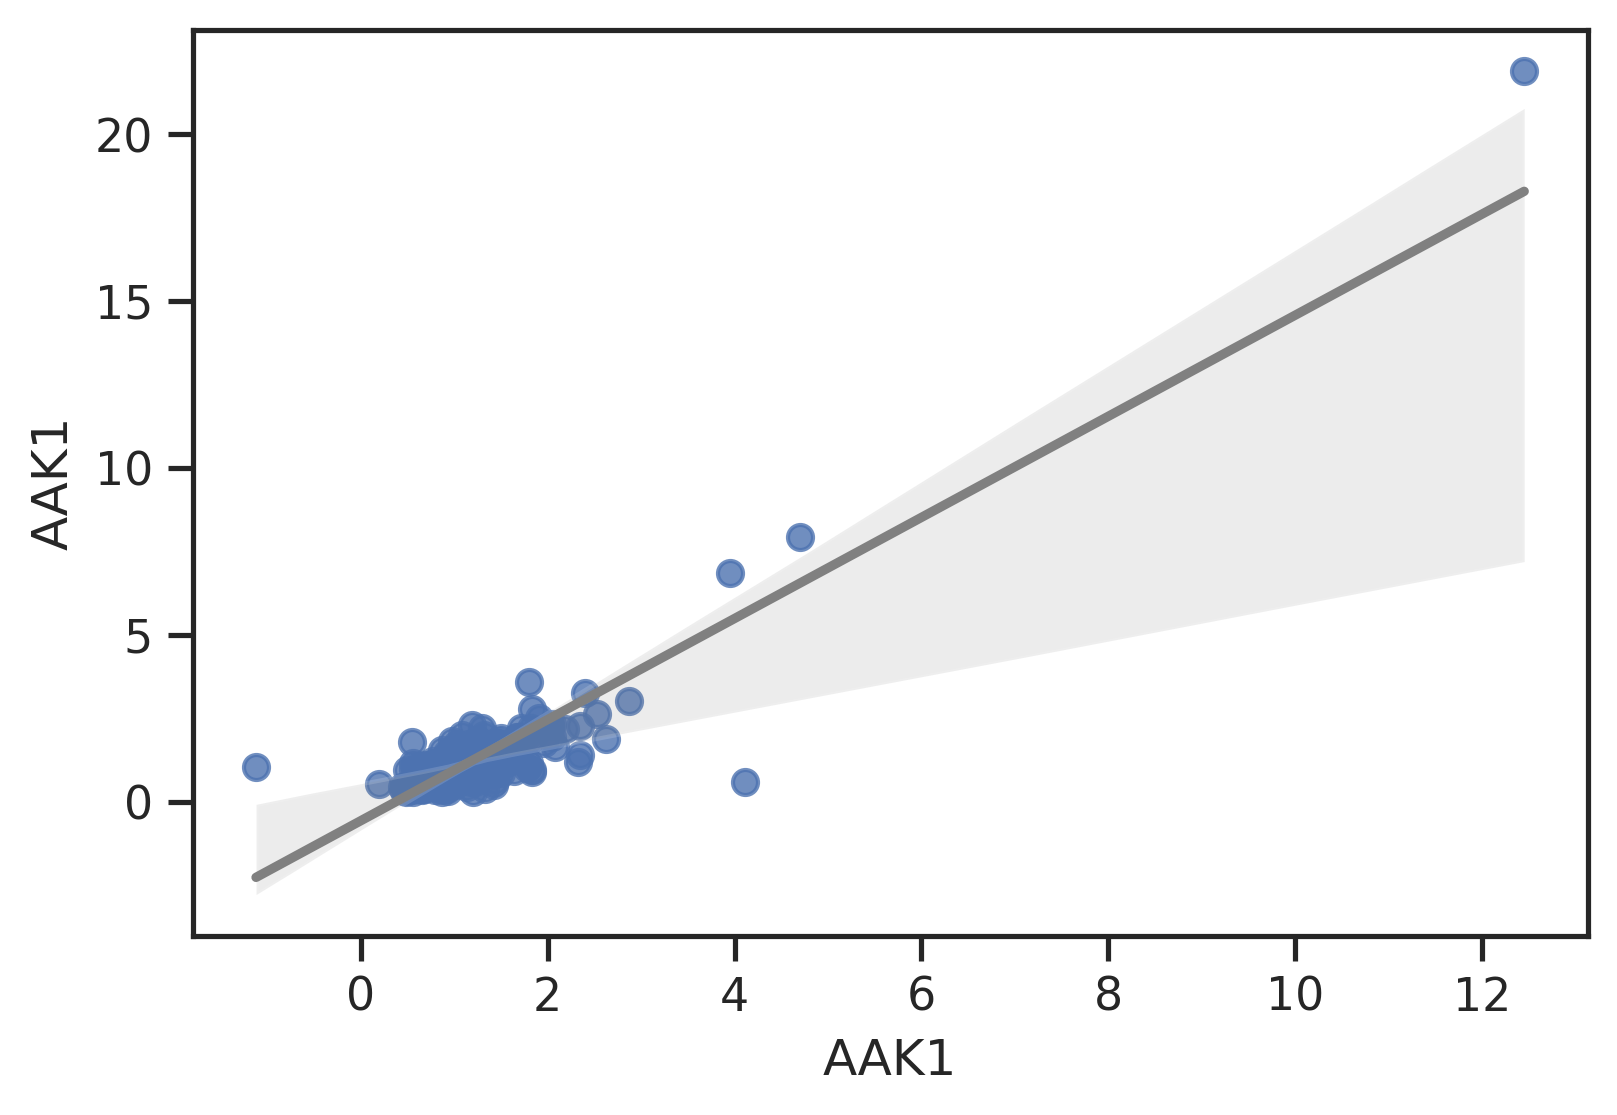

In [ ]:
sns.regplot(
            x=oof.loc['AAK1'],
            y=y.loc['AAK1'],
            # order=order,
            line_kws={'color': 'gray'}
       )

In [ ]:
us_oof = unstack(oof,'predicted')

In [ ]:
us_y = unstack(y,'target')

In [ ]:
us_oof.head(2)

,kinase,substrate,predicted,position,aa
0,AAK1,-1A,0.869895,-1,A
1,ACVR2A,-1A,0.651205,-1,A


In [ ]:
us_y.head(2)

,kinase,substrate,target,position,aa
0,AAK1,-1A,0.946369,-1,A
1,ACVR2A,-1A,0.817853,-1,A


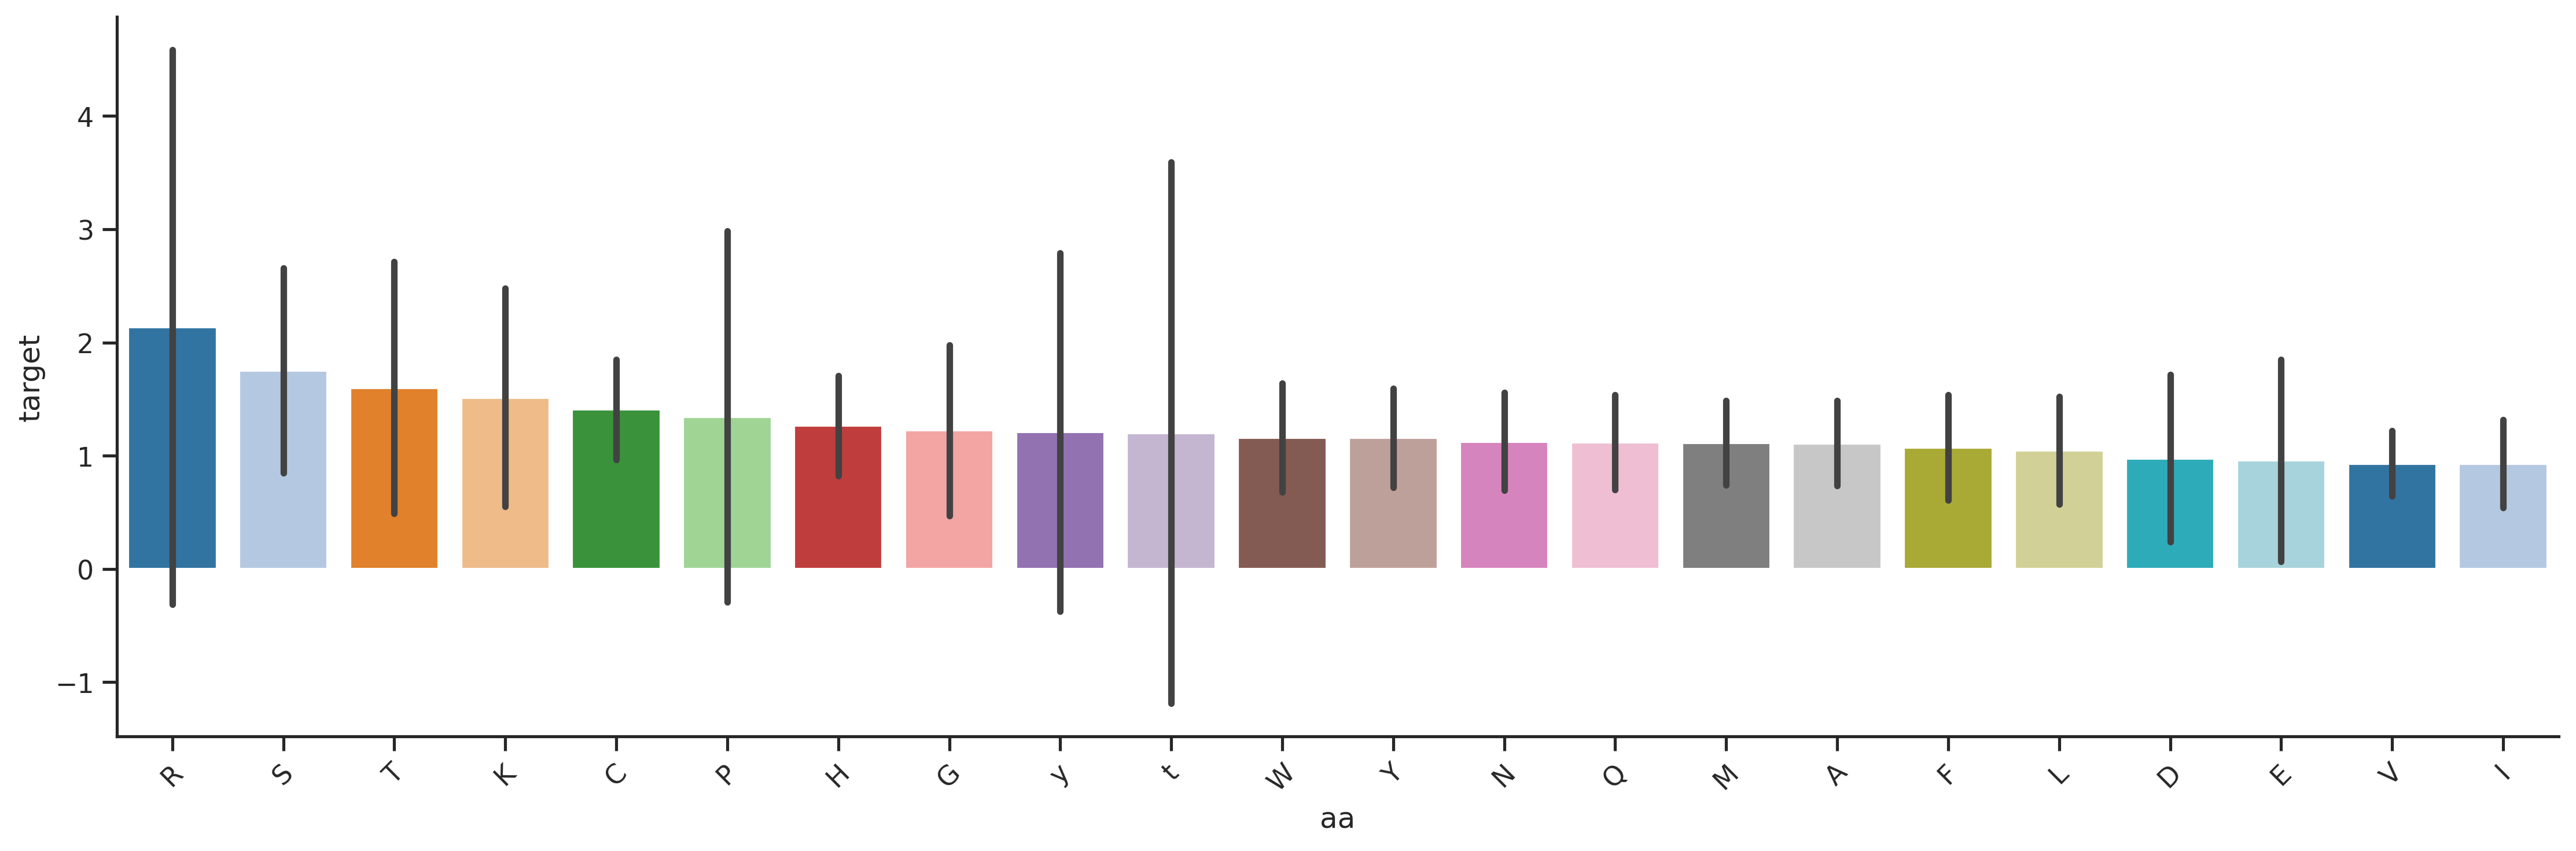

In [ ]:
plot_bar(us_y,'target','aa', circle=False)

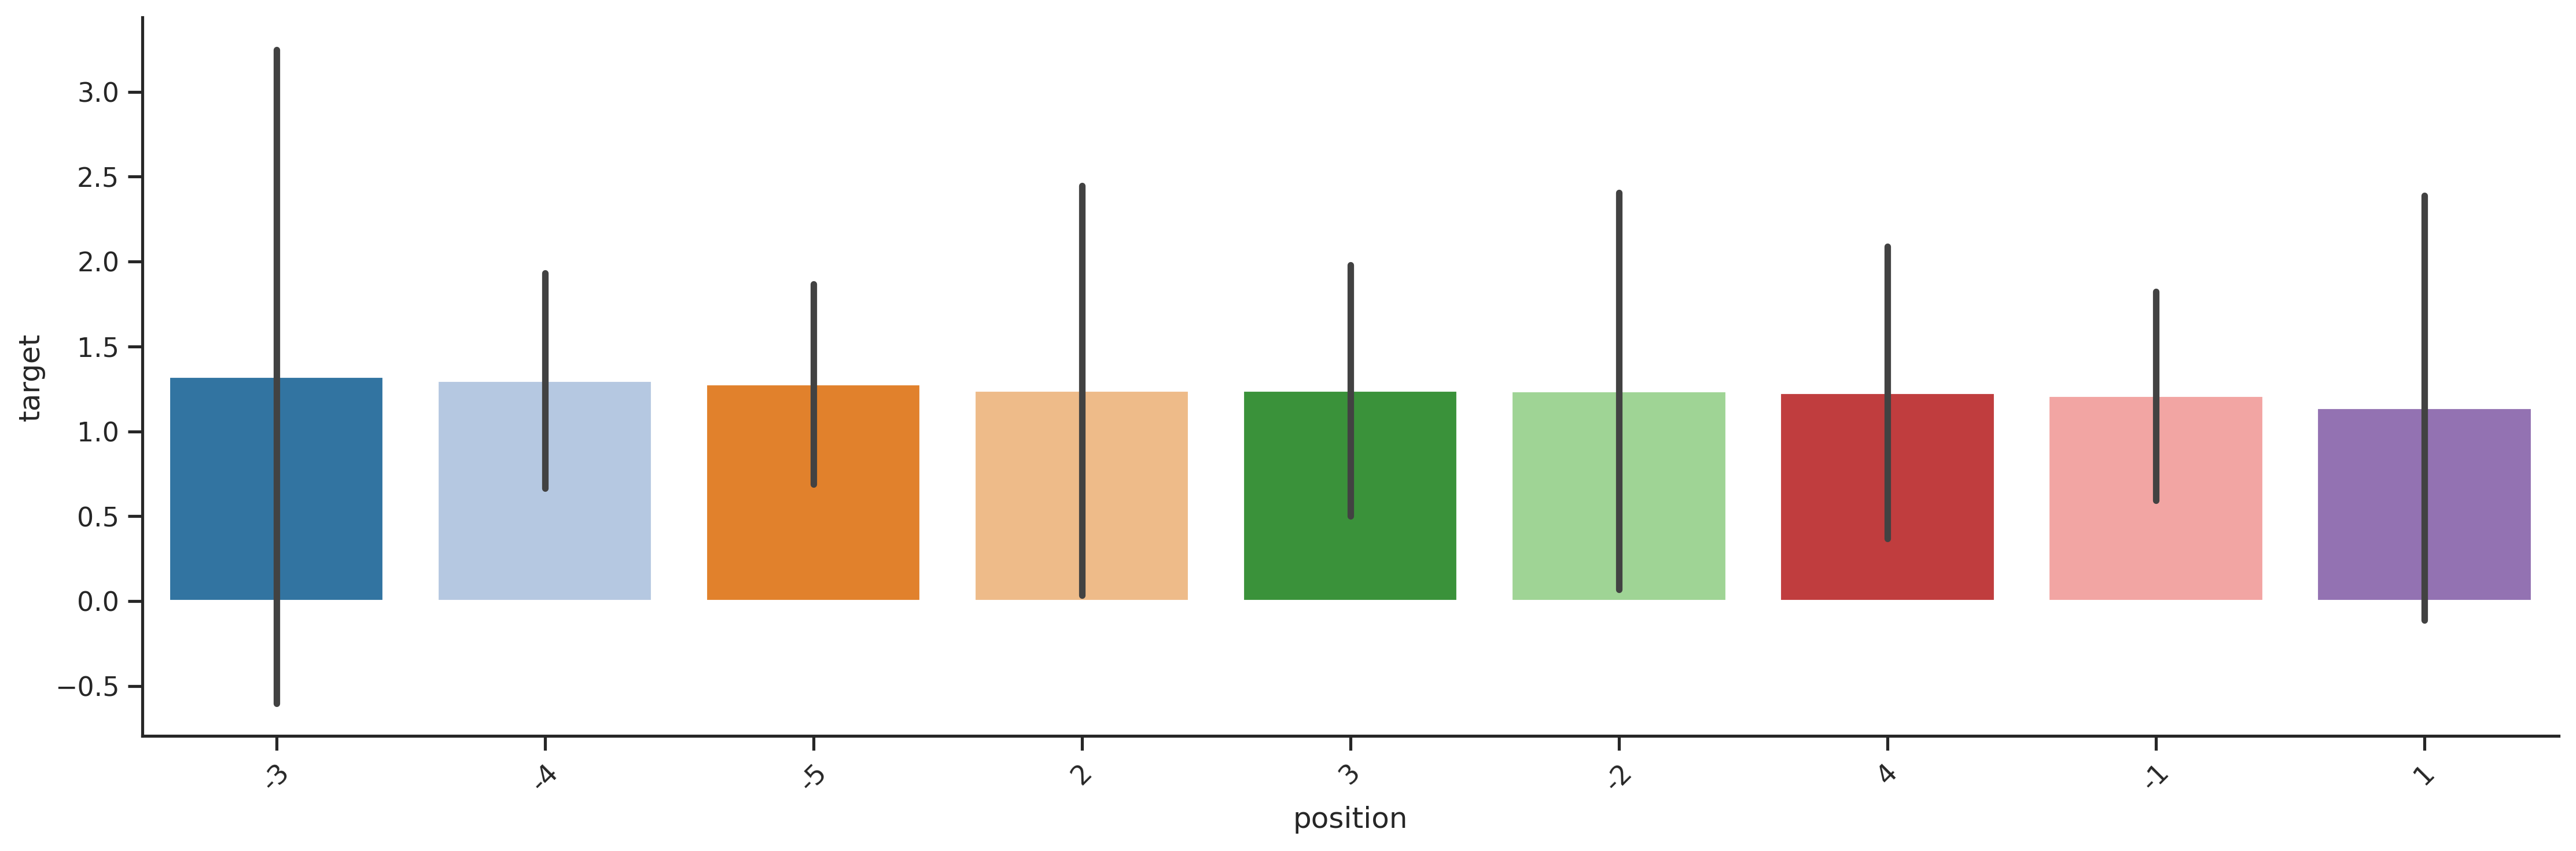

In [ ]:
plot_bar(us_y,'target','position', circle=False)